In [325]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import dabl
import sweetviz as sw
from imblearn.over_sampling import ADASYN

from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

%matplotlib inline

In [326]:
data = pd.read_csv('./water_p.csv')

In [327]:
data.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Potability
0,7.080795,204.890455,207.913190,7.300212,368.516441,0
1,3.716080,129.422921,186.300579,6.635246,333.775777,0
2,8.099124,224.236259,199.095417,9.275884,333.775777,0
3,8.316766,214.373394,220.184174,8.059332,356.886136,0
4,9.092223,181.101509,179.789863,6.546600,310.135738,0
5,5.584087,188.313324,287.486877,7.544869,326.678363,0
6,10.223862,248.071735,287.497165,7.513408,393.663396,0
7,8.635849,203.361523,136.720918,4.563009,303.309771,0
8,7.080795,118.988579,142.855839,7.804174,268.646941,0
9,11.180284,227.231469,254.845085,9.077200,404.041635,0


In [328]:
# Checking the distribution of classes
print('0: ', data.Potability.value_counts()[0] / len(data) * 100, '%')
print('1: ', data.Potability.value_counts()[1] / len(data) * 100, '%')


0:  50.0 %
1:  50.0 %


In [329]:
X, y = data.drop('Potability', axis=1), data.Potability

In [330]:
# Filling empty values
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

In [380]:
# Model preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [413]:
dabl.AnyClassifier().get_params()

{'min_resources': 'exhaust',
 'n_jobs': None,
 'portfolio': 'baseline',
 'type_hints': None,
 'verbose': 0}

In [414]:
estimators = [(f'any{x+1}', dabl.AnyClassifier()) for x in range(3)] + [('rfc', RandomForestClassifier()), ('abc', AdaBoostClassifier()), ('lr', LogisticRegression(C=1.00, penalty='l2'))]
estimators

[('any1', AnyClassifier()),
 ('any2', AnyClassifier()),
 ('any3', AnyClassifier()),
 ('rfc', RandomForestClassifier()),
 ('abc', AdaBoostClassifier()),
 ('lr', LogisticRegression())]

In [415]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C=1.00, penalty='l2'))

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [417]:
clf

StackingClassifier(estimators=[('any1', AnyClassifier()),
                               ('any2', AnyClassifier()),
                               ('any3', AnyClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('abc', AdaBoostClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [418]:
clf.fit(X_train, y_train)

best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.691
best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.695
best classifier:  RandomForestClassifier(max_features='log2')
best score: 0.695
best classifier:  RandomForestClassifier(max_features=None)
best score: 0.674
best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.688
best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.669
best classifier:  RandomForestClassifier(max_features=None)
best score: 0.677
best classifier:  SVC(C=1)
best score: 0.658
best classifier:  RandomForestClassifier(max_features='sqrt')
best score: 0.691
best classifier:  RandomForestClassifier(max_features=None)
best score: 0.682
best classifier:  RandomForestClassifier(max_features=None)
best score: 0.667
best classifier:  RandomForestClassifier(max_features=None)
best score: 0.688
best classifier:  RandomForestClassifier(max_features='log2')
best score: 0.690
best 

StackingClassifier(estimators=[('any1', AnyClassifier()),
                               ('any2', AnyClassifier()),
                               ('any3', AnyClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('abc', AdaBoostClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [419]:
# Checking results
clf.score(X_test, y_test)

0.7081122062168309

In [420]:
y_pred = clf.predict(X_test)

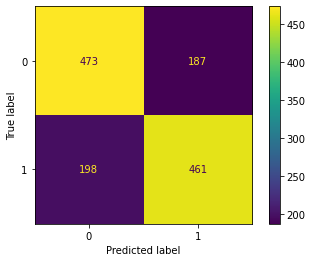

In [421]:
plot_confusion_matrix(clf, X_test, y_test)

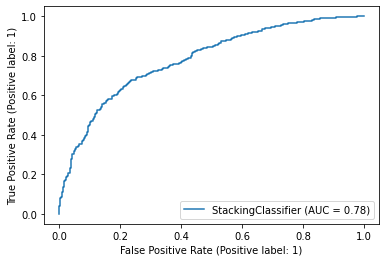

In [422]:
plot_roc_curve(clf, X_test, y_test)

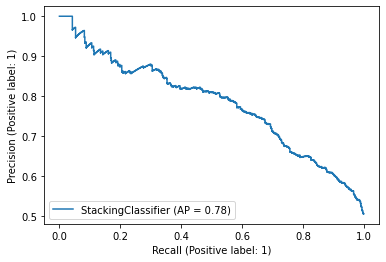

In [423]:
plot_precision_recall_curve(clf, X_test, y_test)